In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolTransforms
from rdkit.Chem import DataStructs
import numpy as np
from rdkit.Chem import Draw
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sdf = Chem.SDMolSupplier( "3d_amine.sdf", removeHs=False )
mols = [ m for m in sdf ]
fps = [ AllChem.GetMorganFingerprintAsBitVect( mol,2 ) for mol in mols ]
mol = mols[1]
mol.GetSubstructMatch( Chem.MolFromSmarts( "N[H]" ) )
atoms = [atom for atom in mol.GetAtoms()]

def getev( mol ):
    if mol.GetNumConformers() >= 1:
        matches = mol.GetSubstructMatches( Chem.MolFromSmarts( "N[H]" ) )
        conf = mol.GetConformer()
        theta = rdMolTransforms.GetDihedralDeg( conf,
                                                matches[0][1],
                                                matches[0][0],
                                                matches[1][0],
                                                matches[1][1]  )
        temp_phi1 = 180 - rdMolTransforms.GetAngleDeg(conf,
                                           matches[1][0],
                                           matches[0][0],
                                           matches[0][1]
                                          )
        temp_phi2 = 180 - rdMolTransforms.GetAngleDeg(conf,
                                           matches[0][0],
                                           matches[1][0],
                                           matches[1][1]
                                          )
        if temp_phi1 >= temp_phi2:
            phi1 = temp_phi1
            phi2 = temp_phi2
        else:
            phi1 = temp_phi2
            phi2 = temp_phi1
            
        r = rdMolTransforms.GetBondLength( conf, matches[0][0], matches[1][0] )
        return theta, phi1, phi2, r
    else:
        print( "No conformer!" )


def transform_cartegian( theta, phi1, phi2, r ):
    theta = np.deg2rad( theta )
    phi1 = np.deg2rad( phi1 )
    phi2 = np.deg2rad( phi2 )
    x = np.sin( theta ) * np.sin( phi1 ) * np.sin( phi2 ) *r
    y = np.sin( theta ) * np.sin( phi1 ) * np.cos( phi2 ) *r
    z = np.sin( theta ) * np.cos( phi1 ) *r
    t = np.cos( theta ) *r
    return x, y, z, t

def get_dist(v1,v2):
    v1 = np.asarray( v1 )
    v2 = np.asarray( v2 )
    delta =  v1 - v2
    d = np.linalg.norm( delta )
    return d


In [3]:
def calc_distance( mol1, mol2 ):
    theta1, phi11, phi21, r1 = getev( mol1 )
    theta2, phi12, phi22, r2 = getev( mol2 )
    cart1 = transform_cartegian( theta1, phi11, phi21, r1 )
    cart2 = transform_cartegian( theta2, phi12, phi22, r2 )
    d = get_dist( cart1, cart2 )
    return d

In [7]:
df = pd.DataFrame(dataset, columns=['dist','sim'])

/Users/iwatobipen/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


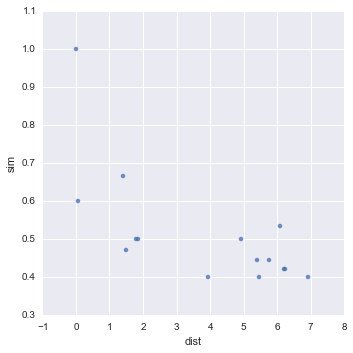

In [8]:
g=sns.lmplot('dist','sim',df, fit_reg=False)

In [10]:
len(mols)

15

In [11]:
datasets = [ getev(mol) for mol in mols ]

In [14]:
datadict = { 'theta': [data[0] for data in datasets ] , 
            'phi1': [data[1] for data in datasets ],
            'phi2': [data[2] for data in datasets ],
            'r': [data[3] for data in datasets ] }

In [15]:
df = pd.DataFrame(datadict)

In [17]:
df.head()

,phi1,phi2,r,theta
0,95.144560,73.623772,3.146983,-72.921352
1,96.238121,68.160414,3.413222,154.397291
2,123.369913,79.976269,4.396864,69.708195
3,79.441975,79.441975,2.953801,180.000000
4,72.223406,70.292055,3.744892,-109.089956


/Users/iwatobipen/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


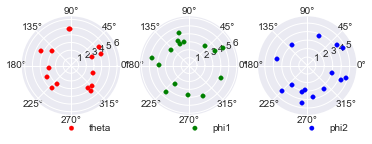

In [49]:
polarplot = plt.subplot(131,polar=True)
polarplot.scatter( df.theta, df.r,color='r' )
plt.legend(['theta'],bbox_to_anchor=(1.00, 0))

polarplot = plt.subplot(132,polar=True)
polarplot.scatter( df.phi1, df.r, color='g' )
plt.legend(['phi1'],bbox_to_anchor=(1.00, 0))

polarplot = plt.subplot(133,polar=True)
polarplot.scatter( df.phi2, df.r, color='b' )
plt.legend(['phi2'],bbox_to_anchor=(1.00, 0))
plt.show()

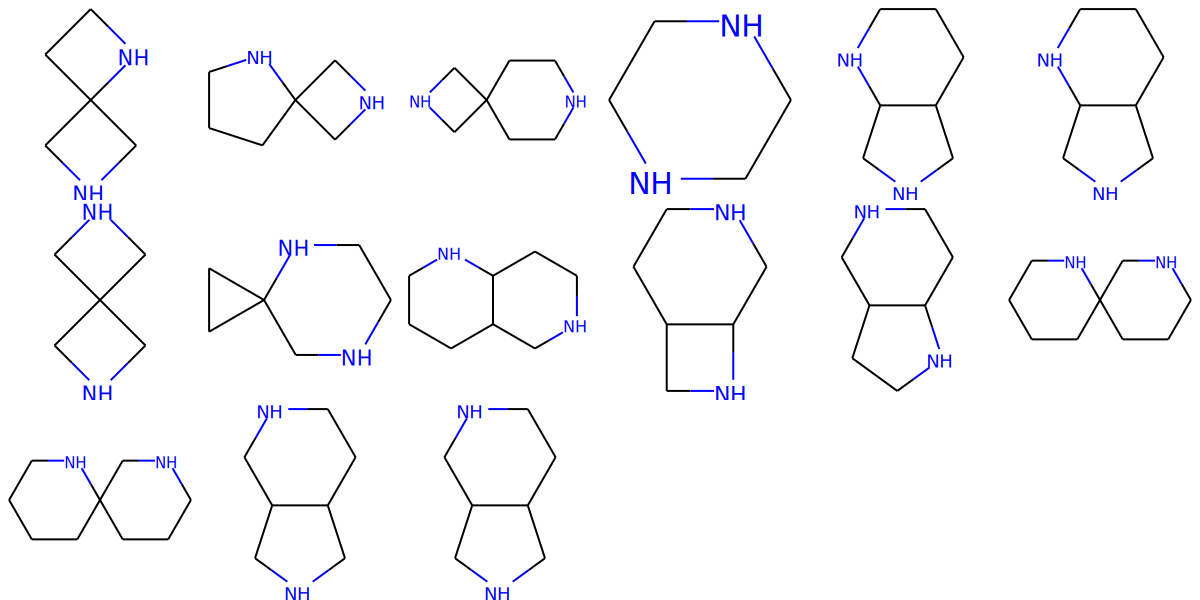

In [46]:
Draw.MolsToGridImage([Chem.RemoveHs(mol) for mol in mols],size=(10,10), molsPerRow=6)